# Missing Data

Outline:
- MissingNo
- Subplots - one per well
- Dealing with Missing Data - Listwise Deletion


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [2]:
df = pd.read_csv('data\spwla_volve_data.csv')

In [3]:
df.head()

,wellName,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
0,15/9-F-1 A,3431.0,8.5,8.6718,86.9092,181.2241,53.9384,0.3222,0.5084,0.8457,2.7514,0.6461,0.6467,0.02,1.0,0.6807
1,15/9-F-1 A,3431.1,8.5,8.6250,86.4334,181.1311,57.2889,0.3239,0.4695,0.8145,2.7978,0.7543,0.6570,0.02,1.0,0.7316
2,15/9-F-1 A,3431.2,8.5,8.6250,85.9183,180.9487,59.0455,0.3277,0.5012,0.8048,2.8352,0.8718,0.6858,0.02,1.0,0.7583
3,15/9-F-1 A,3431.3,8.5,8.6250,85.3834,180.7211,58.2550,0.3357,0.6048,0.7984,2.8557,0.9451,0.7913,0.02,1.0,0.7462
4,15/9-F-1 A,3431.4,8.5,8.6250,84.8484,180.4930,59.4569,0.3456,0.7115,0.7782,2.8632,1.0384,0.8730,0.02,1.0,0.7646


In [4]:
df.describe()

,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
count,27845.000000,27845.0,27845.000000,5493.000000,5420.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27845.000000,27600.000000,27736.000000,27736.000000,2.784400e+04
mean,3816.224960,8.5,8.625875,78.000104,131.027912,38.529140,0.188131,352.689922,97.558930,2.379268,1561.079977,30.041154,0.157434,0.531684,2.724204e-01
std,398.843662,0.0,0.079941,7.730495,13.230939,21.814711,0.053390,1367.355219,395.725094,0.162293,9570.308431,210.915588,0.075957,0.353637,1.872371e-01
min,3223.000000,8.5,8.304900,54.280000,83.574000,6.869100,0.024000,0.197400,0.234900,1.627000,0.139000,0.136600,0.001000,0.043000,1.820000e-15
25%,3503.000000,8.5,8.556900,72.562500,123.403425,21.128200,0.157000,1.856400,1.781000,2.240000,2.148300,1.884000,0.091000,0.201000,1.258000e-01
50%,3713.300000,8.5,8.625000,77.228000,131.864350,35.071000,0.183900,4.035800,3.681200,2.356000,5.136800,4.195400,0.178000,0.433000,2.400000e-01
75%,4057.000000,8.5,8.672000,84.342900,138.017500,49.178300,0.215200,14.929000,8.891000,2.502500,24.687400,14.782650,0.225000,1.000000,3.540000e-01
max,4744.000000,8.5,9.175000,96.277600,186.090800,127.055700,0.541000,6381.099100,2189.603000,3.090000,62290.770000,5571.435100,0.292000,1.000000,1.000000e+00


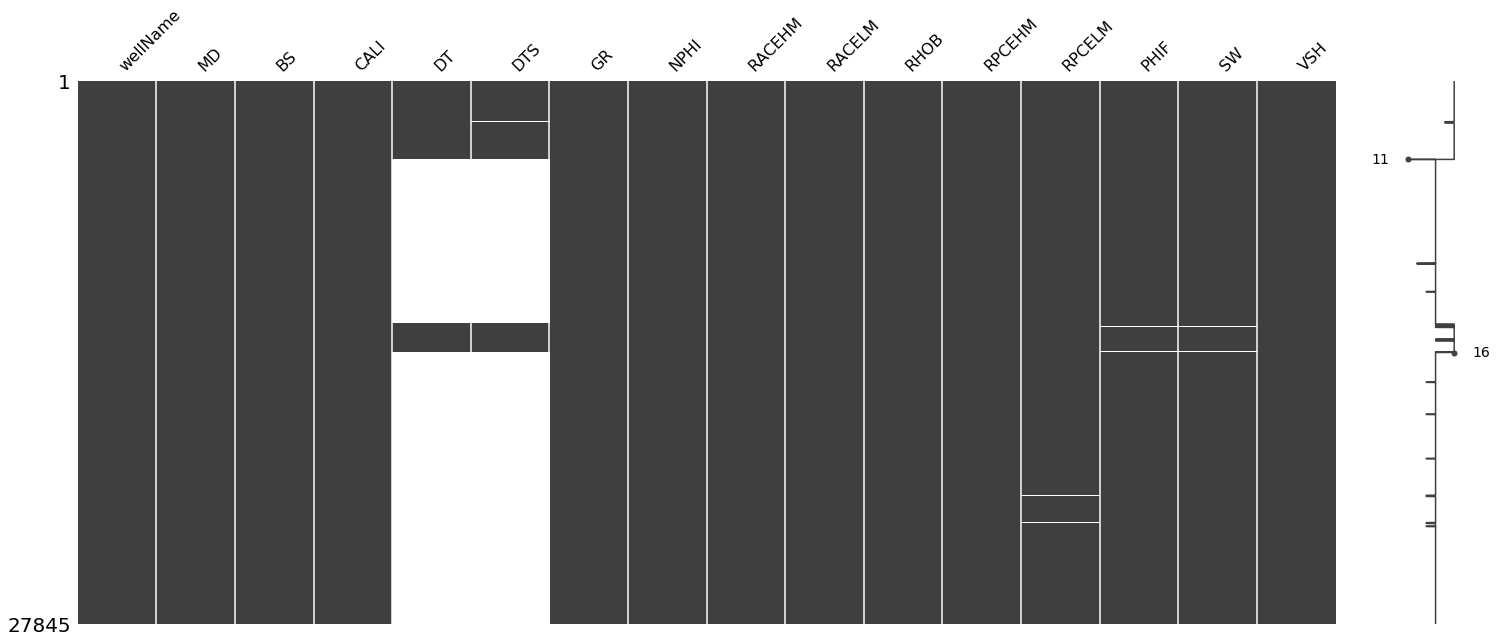

In [5]:
msno.matrix(df)

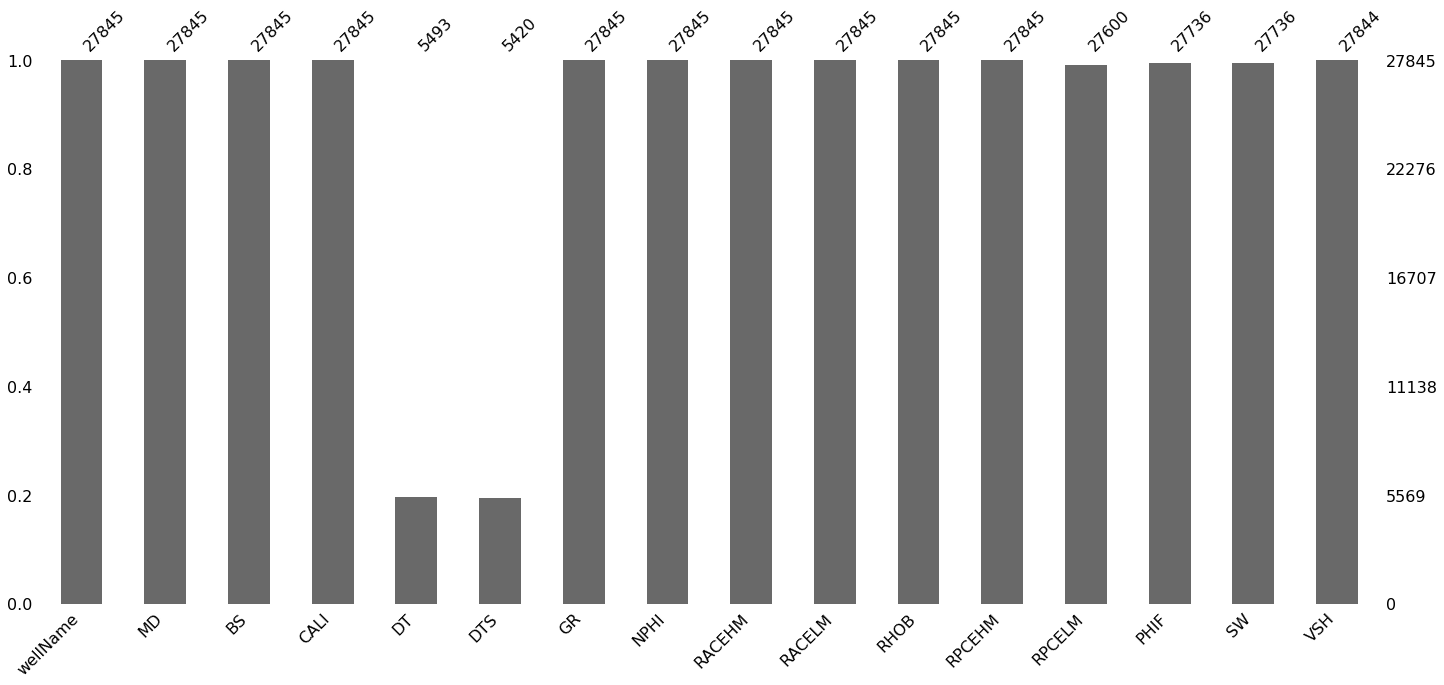

In [6]:
msno.bar(df)

In [7]:
data_nan = df.copy()
for num, col in enumerate(data_nan.columns[2:]):
    data_nan[col] = data_nan[col].notnull() * (num + 1)
    data_nan[col].replace(0, num, inplace=True)

In [8]:
data_nan.head()

,wellName,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
0,15/9-F-1 A,3431.0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,15/9-F-1 A,3431.1,1,2,3,4,5,6,7,8,9,10,11,12,13,14
2,15/9-F-1 A,3431.2,1,2,3,4,5,6,7,8,9,10,11,12,13,14
3,15/9-F-1 A,3431.3,1,2,3,4,5,6,7,8,9,10,11,12,13,14
4,15/9-F-1 A,3431.4,1,2,3,4,5,6,7,8,9,10,11,12,13,14


In [9]:
grouped = data_nan.groupby('wellName')

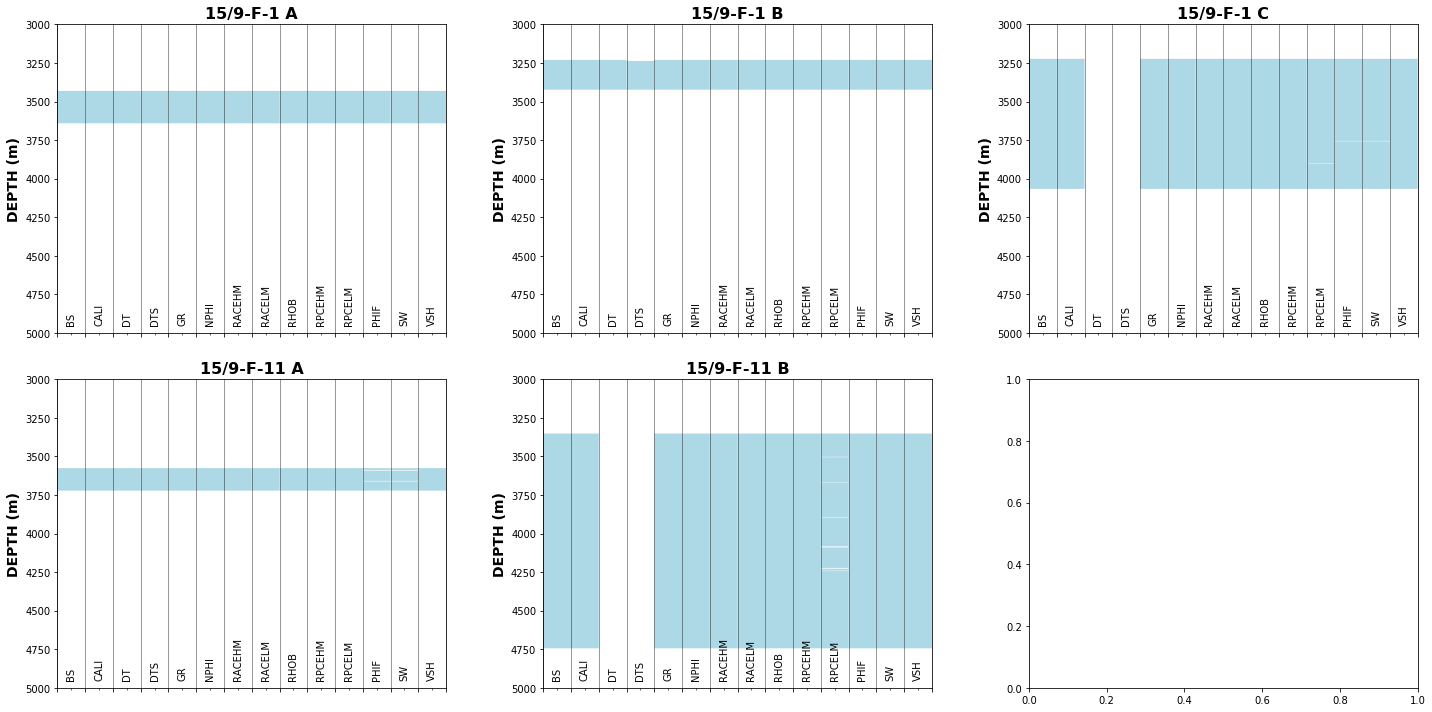

In [10]:
#Setup the labels we want to display on the x-axis
labels = ['BS', 'CALI', 'DT', 'DTS', 'GR', 'NPHI', 'RACEHM', 'RACELM', 'RHOB', 'RPCEHM', 'RPCELM', 'PHIF', 'SW', 'VSH']
#Setup the figure and the subplots
fig, axs = plt.subplots(2, 3, figsize=(20,10))
#Loop through each well and column in the grouped dataframe
for (name, df), ax in zip(grouped, axs.flat):
    ax.set_xlim(0,9)
    
    #Setup the depth range
    ax.set_ylim(5000, 3000)
    
    # Create multiple fill betweens for each curve# This is between
    # the number representing null values and the number representing
    # actual values
    ticks = []
    ticks_labels = []
    for i, curve in enumerate(labels):
        ax.fill_betweenx(df.MD, i, df[curve], facecolor='lightblue')
        ticks.append(i)
        ticks_labels.append(i+0.5)
    
    # add extra value on to ticks
    ticks.append(len(ticks))
    
    #Setup the grid, axis labels and ticks
    ax.grid(axis='x', alpha=0.5, color='black')
    ax.set_ylabel('DEPTH (m)', fontsize=14, fontweight='bold')
    
    #Position vertical lines at the boundaries between the bars
    ax.set_xticks(ticks, minor=False)
    
    #Position the curve names in the centre of each column
    ax.set_xticks(ticks_labels, minor=True)
    
    #Setup the x-axis tick labels
    ax.set_xticklabels(labels,  rotation='vertical', minor=True, verticalalignment='bottom')
    ax.set_xticklabels('', minor=False)
    ax.tick_params(axis='x', which='minor', pad=-10)
    
    #Assign the well name as the title to each subplot
    ax.set_title(name, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.show()